In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, data, restoration
from scipy import ndimage
from metric import get_BRISQUE_score
from PIL import Image

def sharpen(image,psf, display=True, quality = True):
    image = image[50:-125,100:-25,:]
    image_offset = image.copy()/255.
    image_offset += 1e-10
    sharpened = restoration.richardson_lucy(image_offset, psf, iterations=30)
    sharpened = sharpened[20:-20,20:-20,:]
    
    if display:
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
        plt.gray()
        for a in (ax[0], ax[1]):
            a.axis('off')

        ax[0].imshow(image)
        ax[0].set_title('Original Data')

        ax[1].imshow(sharpened, vmin=image.min(), vmax=image.max())
        ax[1].set_title('Restoration using\nRichardson-Lucy')

        fig.subplots_adjust(wspace=0.02, hspace=0.2, top=0.9, bottom=0.05, left=0, right=1)
        plt.show()

    if quality:
        original = Image.fromarray(np.uint8(image))
        sharp = Image.fromarray(np.uint8(sharpened*255.))
        return sharpened, get_BRISQUE_score('original.png'), get_BRISQUE_score('sharp.png')
    else:
        return sharpened, 0, 0

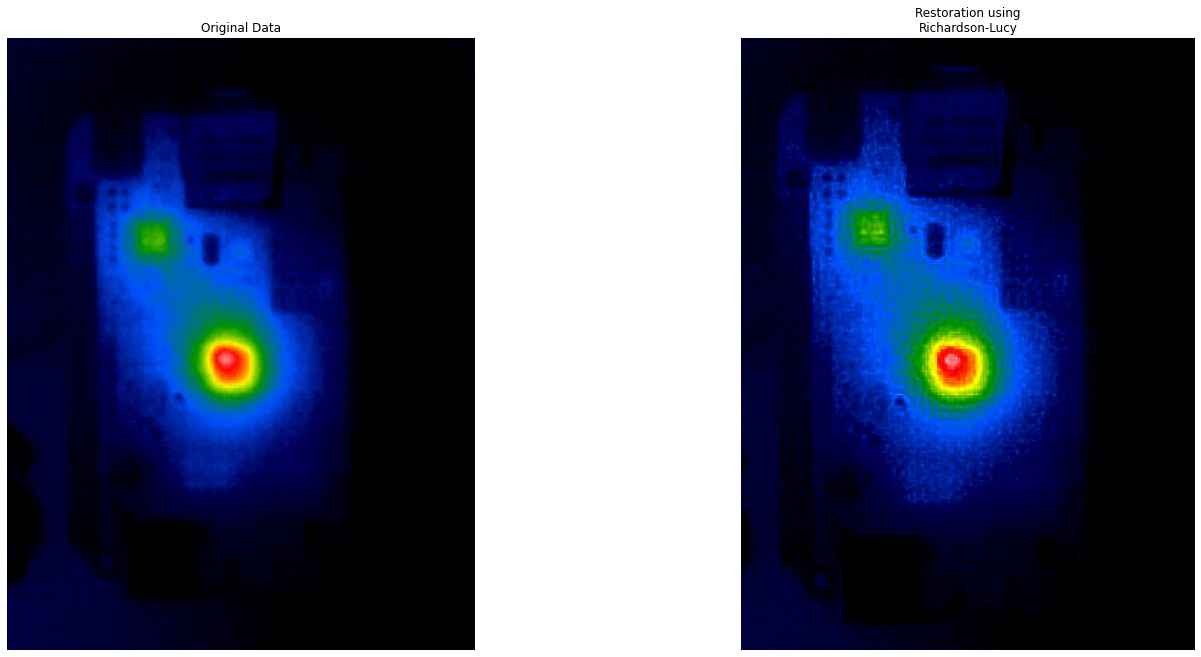

74.03512133423871 31.281853912205833


/vulcanscratch/vinoj/vinoj/own/Thermal_Anomaly_Detection/metric.py:95: RuntimeWarning: invalid value encountered in sqrt
  sigma = (sigma - mu_sq)**0.5


In [2]:
# image = data.astronaut()
image = np.array(Image.open('examples/sample_thermal.jpg'))

psf = np.ones((5, 5, 1)) / 25
sharpened, original_score, sharpened_score = sharpen(image,psf,True,True)
print(original_score, sharpened_score)

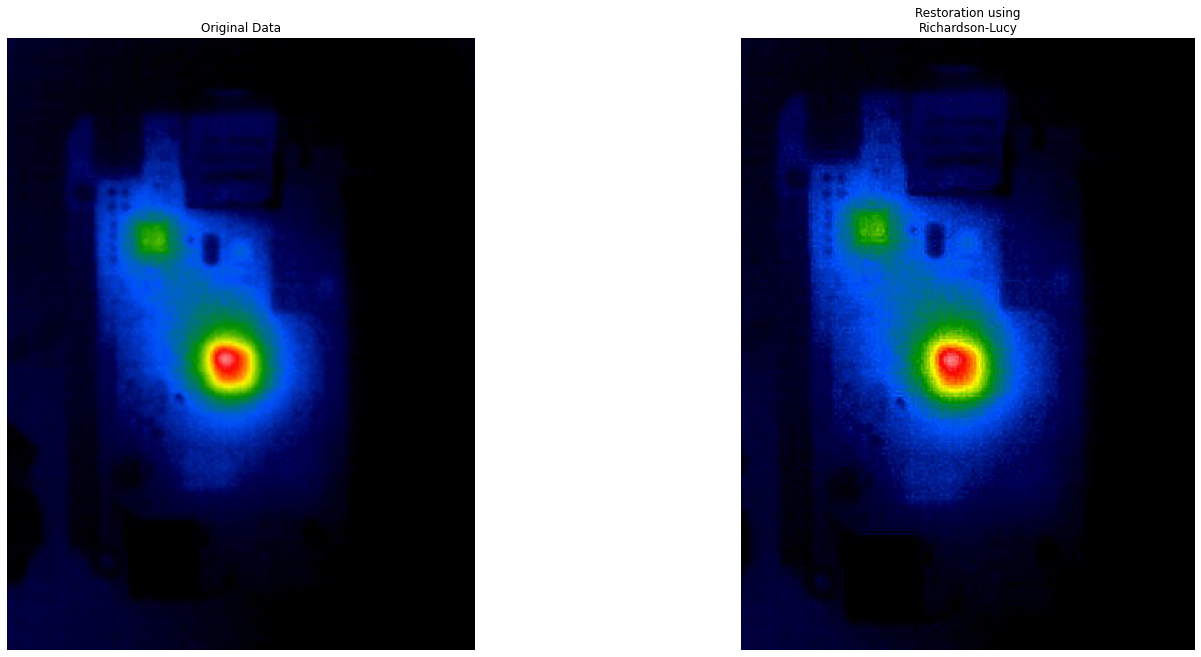

74.03512133423871 22.973496945388405


In [3]:
psf = np.random.normal(0.5, 0.1, (3,3,1))
sharpened, original_score, sharpened_score = sharpen(image,psf,True,True)
print(original_score, sharpened_score)

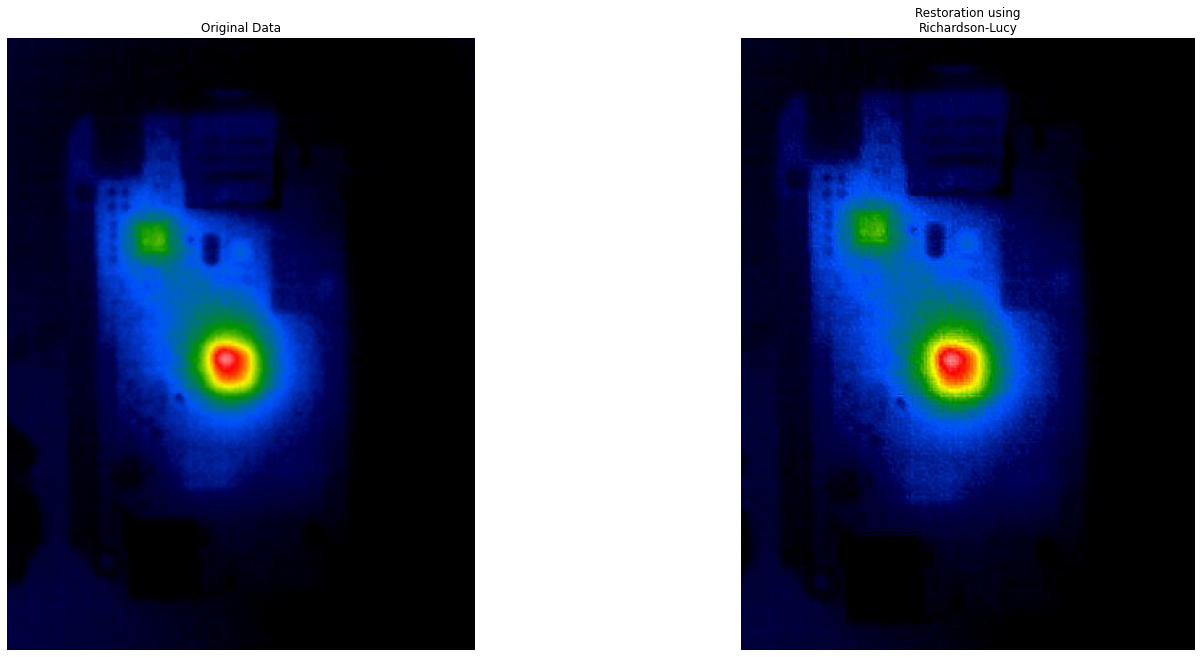

74.03512133423871 22.396898168734054


In [9]:
psf = np.random.beta(3,2,size=(3,3,1))
sharpened, original_score, sharpened_score = sharpen(image,psf,True,True)
print(original_score, sharpened_score)

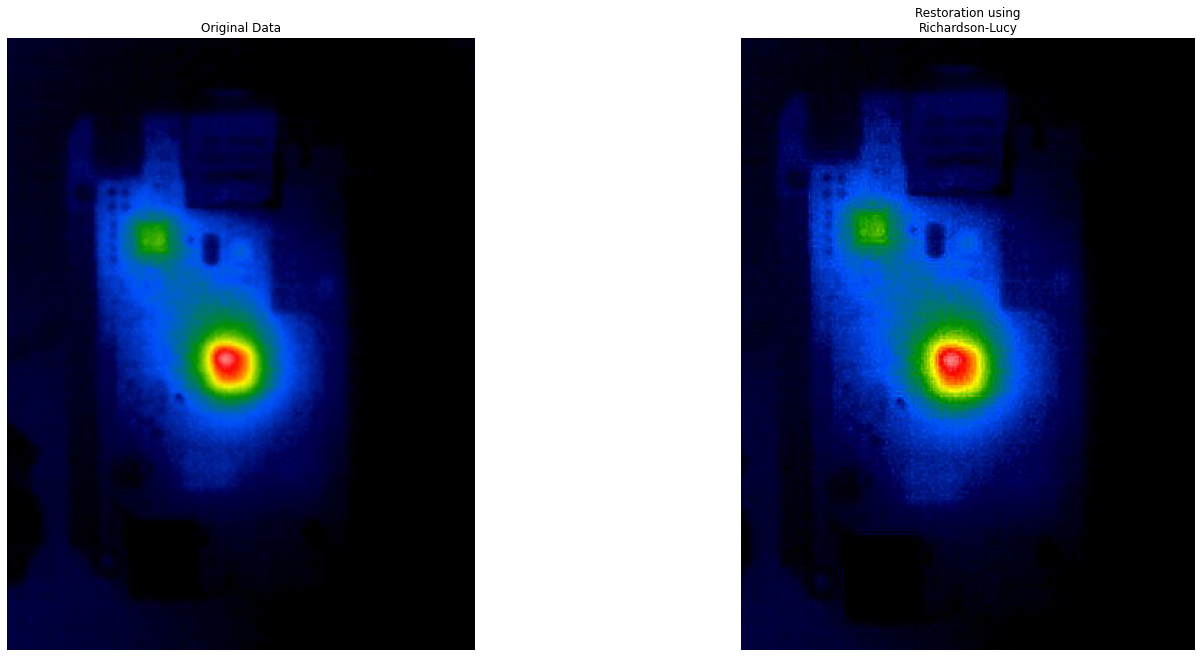

74.03512133423871 24.958281178287933


In [5]:
psf = np.random.laplace(2,0.01,size=(3,3,1))
sharpened, original_score, sharpened_score = sharpen(image,psf,True,True)
print(original_score, sharpened_score)